<a href="https://colab.research.google.com/github/christabs27/Linear-Regression-for-Heights/blob/main/11_10_3_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lesson 11.10.3 Activity

##Breast Cancer Detection

According to the <a href="https://www.cancer.org/cancer/breast-cancer/about/how-common-is-breast-cancer.html">American Cancer Society (n.d.)</a>, breast cancer is the second-most common type of cancer diagnosed in American women, behind only skin cancers. The average risk of a woman in the United States developing breast cancer sometime in her life is about 13%. This means there is a 1 in 8 chance that she will develop breast cancer.

Mammograms are used to detect breast cancer, hopefully at an early stage; however, many masses that appear on a mammogram are not actually cancerous. Developing a machine learning model to predict whether a tumor is benign or cancerous would be helpful for physicians as they guide and treat patients. 

For this activity, you'll revisit the full dataset, which contains the mean, standard deviation (SD), and *worst* value of each tumor measurement.

There are a lot of factors, and many of them are clearly related to one another. In this activity, you will use recurisive feature elimination (RFE) to select the smallest number of features that will still do a good job predicting which tumors are cancerous and which are benign.

#Step 1: Download and Save the `cancer_full.csv` Data Set from the Class Resources  

* Make a note of where you saved the file on your computer.

#Step 2: Upload the `cancer_full.csv` Data Set by Running the Following Code Block 

* When prompted, navigate to where you saved the `cancer_full.csv` data set on your computer. Select the file. 

In [1]:
#Step 2

from google.colab import files
cancer_full = files.upload()

Saving cancer_full.csv to cancer_full.csv


#Step 3: Import the Necessary Packages
Import the following packages:
```
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import numpy as np
```

In [2]:
#Step 3
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import RFE
import numpy as np




# Step 4: Prepare the Data 
* Run the following code block to complete all the steps necessary to prepare the data for modeling.
* As a reminder, you'll be recasting the diagnosis as a numeric rather than character variable, splitting the data into the target vector and feature matrix, and then splitting the data into training and test sets.

In [3]:
#Step 4

cancer_full = pd.read_csv('cancer_full.csv')

cancer_full.loc[cancer_full['diagnosis'] == 'M', 'cancer_present'] = 1
cancer_full.loc[cancer_full['diagnosis'] == 'B', 'cancer_present'] = 0

y = cancer_full['cancer_present']
X = cancer_full.drop(['id','diagnosis','cancer_present'], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)




##Step 5: Build a Pipeline That Will Standardize the Data, Model the Data Using Logistic Regression, and Select the Top Five Most Important Features Using RFE
* Because it's been a long time since you've built a ML pipeline, review the following code sample for guidance:

```
pipe     = Pipeline([('scaler', StandardScaler()), 
                     ('rfe', RFE(estimator=LogisticRegression(), n_features_to_select=5)),
                     ('log_reg', LogisticRegression(random_state=0))])

pipe.fit(X_train, y_train)

```
* The first step is to standardize the data.  
* The second step is to specify the RFE and the number of features to select. As a starting point, you'll use logistic regression and five features.
* The third step is to specify the model.




In [4]:
#Step 5
pipe     = Pipeline([('scaler', StandardScaler()), 
                     ('rfe', RFE(estimator=LogisticRegression(), n_features_to_select=5)),
                     ('log_reg', LogisticRegression(random_state=0))])

pipe.fit(X_train, y_train)


Pipeline(steps=[('scaler', StandardScaler()),
                ('rfe',
                 RFE(estimator=LogisticRegression(), n_features_to_select=5)),
                ('log_reg', LogisticRegression(random_state=0))])

#Step 6: Determine the Optimal Number of Features
* You can determine the optimal number of features to include in the model by calculating the accuracy for each choice of features.
* Run the following code block to see the mean accuracy for 2 to 14 features.
* At what point does adding features to the model stop increasing the model accuracy?
* What is the highest accuracy that the model can attain?

[0.9340531561461793, 0.9294019933554818, 0.9389258028792913, 0.9552602436323367, 0.9553156146179402, 0.960077519379845, 0.960077519379845, 0.9623477297895903, 0.9623477297895903, 0.9623477297895903, 0.9623477297895903, 0.9623477297895903, 0.9623477297895903]


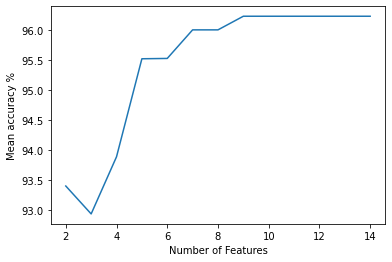

In [5]:
#Step 6

features = list(range(2,15))
mean_accuracy = []

for i in features:
  pipe     = Pipeline([('scaler', StandardScaler()), 
                     ('rfe', RFE(estimator=LogisticRegression(), n_features_to_select=i)),
                     ('log_reg', LogisticRegression(random_state=0))])

  pipe.fit(X_train, y_train)

  scores = cross_val_score(pipe, X_train, y_train, cv=10)
  mean_accuracy.append(scores.mean())

print(mean_accuracy)

k_df = pd.DataFrame(features)
k_df.rename({0:'Number of Features'}, axis=1, inplace=True)

mean_accuracy_df = pd.DataFrame(mean_accuracy)*100
mean_accuracy_df.rename({0:'mean accuracy'}, axis=1, inplace=True)

to_plot = pd.concat([k_df, mean_accuracy_df], axis=1)

plt.plot(to_plot['Number of Features'], to_plot['mean accuracy'])
plt.xlabel('Number of Features')
plt.ylabel('Mean accuracy %')
plt.show()

**Step 6 Answer:**



#Step 7: Determine the Nine Most Important Features of the Data
* You can extract the nine features that were chosen as being most important from the model pipeline using a variable called `support`.
* Features where `Feature Support = True` were selected for the model and features where `Feature Support = False` were not included.
* Which features were included in the model?

In [12]:
#Step 7

pipe     = Pipeline([('scaler', StandardScaler()), 
                     ('rfe', RFE(estimator=LogisticRegression(), n_features_to_select=9)),
                     ('log_reg', LogisticRegression(random_state=0))])

pipe.fit(X_train, y_train)

Feature_support = pd.DataFrame(pipe.named_steps['rfe'].support_, index=X_train.columns)
Feature_support.rename({0:'Feature Support'}, axis=1, inplace=True)
Feature_support = Feature_support.sort_values(by=['Feature Support'], ascending=False)
print(Feature_support)


                         Feature Support
concave points_worst                True
concavity_worst                     True
concave points_mean                 True
area_worst                          True
radius_se                           True
texture_worst                       True
radius_worst                        True
area_se                             True
fractal_dimension_se                True
radius_mean                        False
concave points_se                  False
symmetry_worst                     False
compactness_worst                  False
smoothness_worst                   False
perimeter_worst                    False
symmetry_se                        False
compactness_se                     False
concavity_se                       False
texture_mean                       False
smoothness_se                      False
perimeter_se                       False
texture_se                         False
fractal_dimension_mean             False
symmetry_mean   

**Step 7 Answer:**

             

#Step 8: Compute the Model Accuracy for the Test Data
* You can calculate the model accuracy using the following code:

```
pipe.score(X_test, y_test)
```
* What is the testing accuracy?

In [11]:
#Step 8
pipe.score(X_test, y_test)

0.9790209790209791

**Step 8 Answer:**
